In [2]:
import bctDevV2
import numpy as np
from tqdm import tqdm
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
import sys
from scipy.ndimage import zoom 

Populating the interactive namespace from numpy and matplotlib


### Read in trees

In [5]:
outfile='cut2.0'
trees=bctDevV2.read_binary(outfile)

mOutfile='cutMill500.0'
mTrees=bctDevV2.read_binary(mOutfile)

100%|██████████| 1855/1855 [00:00<00:00, 15054.15it/s]

Read 1795 trees with total 68125 halos
Read 1855 trees with total 55723 halos


### SnapNums and associated redshifts

In [18]:
'''
LJDS
-----
41, 3
53, 2
70, 1
74, 0.82
79, 0.62
90, 0.24
99, 0
'''
zLJDS = [99,90,79,74,70,53,41]

'''
Millennium
----------
27, 3
32, 2
40, 1
43, 0.82
46, 0.62
54, 0.24
63, 0
'''
zMill = [63,54,46,43,40,32,27]

### Read quantitites

In [19]:
Len=5
M_Crit200=7
M_Mean200=6
Velx=12
VelDisp=15
Vmax=16
Spin_x=17
SnapNum=21

leng = []
mcrit = []
mmean = []
snum = []

vx0 = []
vx024 = []
vx062 = []
vx1 = []

vdis0 = []
vdis024 = []
vdis062 = []
vdis082 = []
vdis1 = []
vdis2 = []
vdis3 = []

vmax0 = []
vmax024 = []
vmax062 = []
vmax082 = []
vmax1 = []
vmax2 = []
vmax3 = []

spin0 = []
spin024 = []
spin062 = []
spin082 = []
spin1 = []
spin2 = []
spin3 = []


count=0
for i in tqdm(range(len(trees))):
    for j in range(len(trees[i])):
        mcrit.append(trees[i][j][M_Crit200]*1e10)
        leng.append(trees[i][j][Len]*1.3e9)
        
        if trees[i][j][SnapNum]==zLJDS[0] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis0.append(trees[i][j][VelDisp])
            vmax0.append(trees[i][j][Vmax])
            spin0.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))   
            vx0.append(trees[i][j][Velx])
            
        if trees[i][j][SnapNum]==zLJDS[1] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis024.append(trees[i][j][VelDisp])
            vmax024.append(trees[i][j][Vmax])
            spin024.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))      
            vx024.append(trees[i][j][Velx])
            
        if trees[i][j][SnapNum]==zLJDS[2] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis062.append(trees[i][j][VelDisp])
            vmax062.append(trees[i][j][Vmax])
            spin062.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))
            vx062.append(trees[i][j][Velx])
        
        if trees[i][j][SnapNum]==zLJDS[3] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis082.append(trees[i][j][VelDisp])
            vmax082.append(trees[i][j][Vmax])
            spin082.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))      
        
        if trees[i][j][SnapNum]==zLJDS[4] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis1.append(trees[i][j][VelDisp])
            vmax1.append(trees[i][j][Vmax])
            spin1.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))     
            vx1.append(trees[i][j][Velx])
            
        if trees[i][j][SnapNum]==zLJDS[5] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis2.append(trees[i][j][VelDisp])
            vmax2.append(trees[i][j][Vmax])
            spin2.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))
        
        if trees[i][j][SnapNum]==zLJDS[6] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis3.append(trees[i][j][VelDisp])
            vmax3.append(trees[i][j][Vmax])
            spin3.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))                 

100%|██████████| 1795/1795 [00:01<00:00, 1090.92it/s]


In [20]:
mleng = []
mmcrit = []
mmmean = []
msnum = []

mvx0 = []
mvx024 = []
mvx062 = []
mvx1 = []

mvdis0 = []
mvdis024 = []
mvdis062 = []
mvdis082 = []
mvdis1 = []
mvdis2 = []
mvdis3 = []

mvmax0 = []
mvmax024 = []
mvmax062 = []
mvmax082 = []
mvmax1 = []
mvmax2 = []
mvmax3 = []

mspin0 = []
mspin024 = []
mspin062 = []
mspin082 = []
mspin1 = []
mspin2 = []
mspin3 = []


count = 0
for j in tqdm(range(len(mTrees))):
    for k in range(len(mTrees[j])):
        mmcrit.append(mTrees[j][k][M_Crit200]*(1e10))
        mleng.append(mTrees[j][k][Len]*8.6e8)
        
        if mTrees[j][k][SnapNum]==zMill[0] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis0.append(mTrees[j][k][VelDisp])
            mvmax0.append(mTrees[j][k][Vmax])
            mspin0.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2)) 
            mvx0.append(mTrees[j][k][Velx])
            
        if mTrees[j][k][SnapNum]==zMill[1] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis024.append(mTrees[j][k][VelDisp])
            mvmax024.append(mTrees[j][k][Vmax])
            mspin024.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
            mvx024.append(mTrees[j][k][Velx])
        
        if mTrees[j][k][SnapNum]==zMill[2] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis062.append(mTrees[j][k][VelDisp])
            mvmax062.append(mTrees[j][k][Vmax])
            mspin062.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
            mvx062.append(mTrees[j][k][Velx])
        
        if mTrees[j][k][SnapNum]==zMill[3] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis082.append(mTrees[j][k][VelDisp])
            mvmax082.append(mTrees[j][k][Vmax])
            mspin082.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
        
        if mTrees[j][k][SnapNum]==zMill[4] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis1.append(mTrees[j][k][VelDisp])
            mvmax1.append(mTrees[j][k][Vmax])
            mspin1.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))     
            mvx1.append(mTrees[j][k][Velx])
        
        if mTrees[j][k][SnapNum]==zMill[5] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis2.append(mTrees[j][k][VelDisp])
            mvmax2.append(mTrees[j][k][Vmax])
            mspin2.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
        
        if mTrees[j][k][SnapNum]==zMill[6] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis3.append(mTrees[j][k][VelDisp])
            mvmax3.append(mTrees[j][k][Vmax])
            mspin3.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))                  

100%|██████████| 1855/1855 [00:01<00:00, 1337.69it/s]


---

# Vx

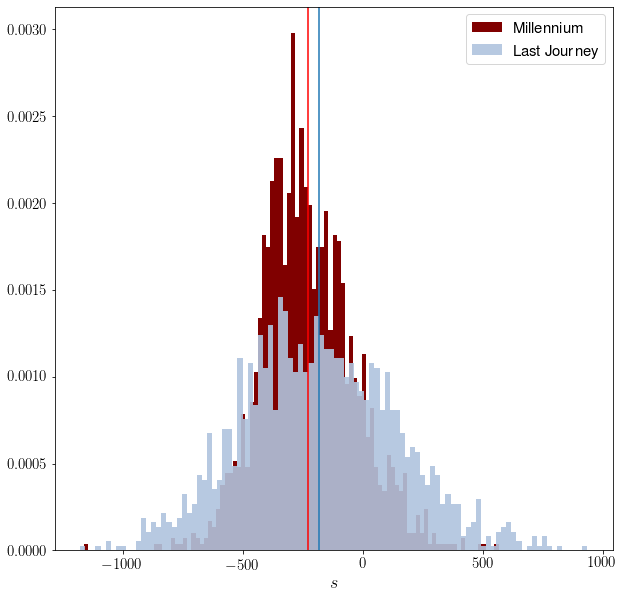

In [21]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvx0]),c='red')
plt.axvline(np.mean([i for i in vx0]))
plt.hist([i for i in mvx0],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in vx0],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(-3,1,"Spin x",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.xlim(0,30)
plt.xlabel('$s$',size=18)
# plt.savefig('_sv1.png')
plt.show()

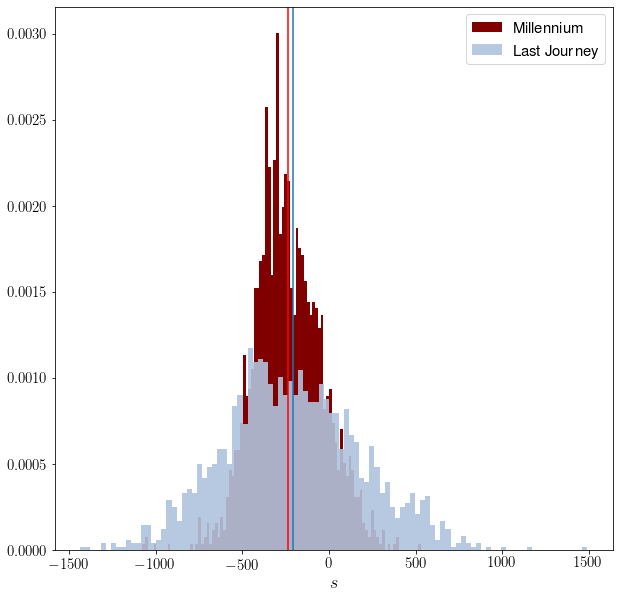

In [22]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvx024]),c='red')
plt.axvline(np.mean([i for i in vx024]))
plt.hist([i for i in mvx024],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in vx024],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(-3,1,"Spin x",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.xlim(0,30)
plt.xlabel('$s$',size=18)
# plt.savefig('_sv1.png')
plt.show()

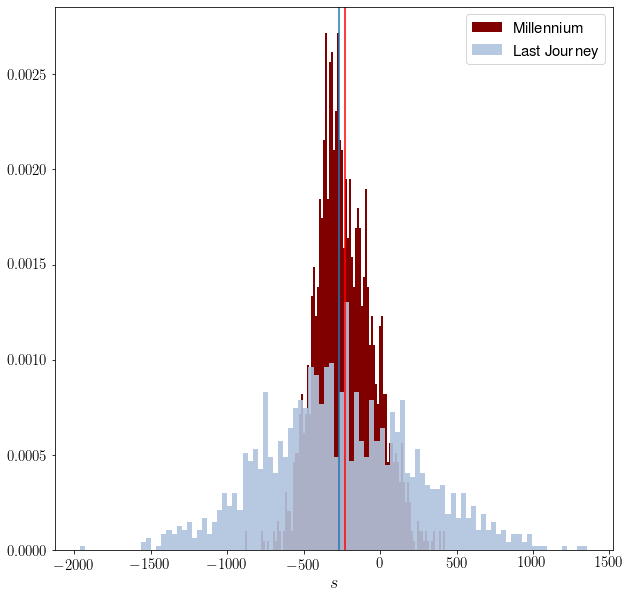

In [23]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvx062]),c='red')
plt.axvline(np.mean([i for i in vx062]))
plt.hist([i for i in mvx062],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in vx062],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(-3,1,"Spin x",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.xlim(0,30)
plt.xlabel('$s$',size=18)
# plt.savefig('_sv1.png')
plt.show()

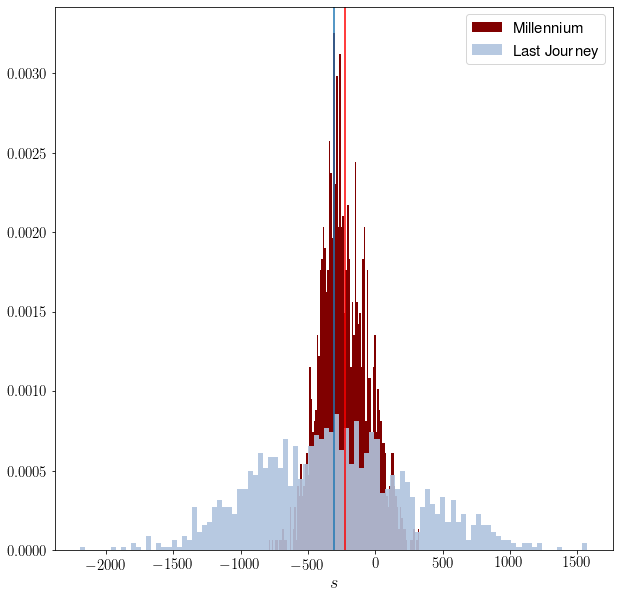

In [24]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvx1]),c='red')
plt.axvline(np.mean([i for i in vx1]))
plt.hist([i for i in mvx1],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in vx1],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(-3,1,"Spin x",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.xlim(0,30)
plt.xlabel('$s$',size=18)
# plt.savefig('_sv1.png')
plt.show()

---

# Spin

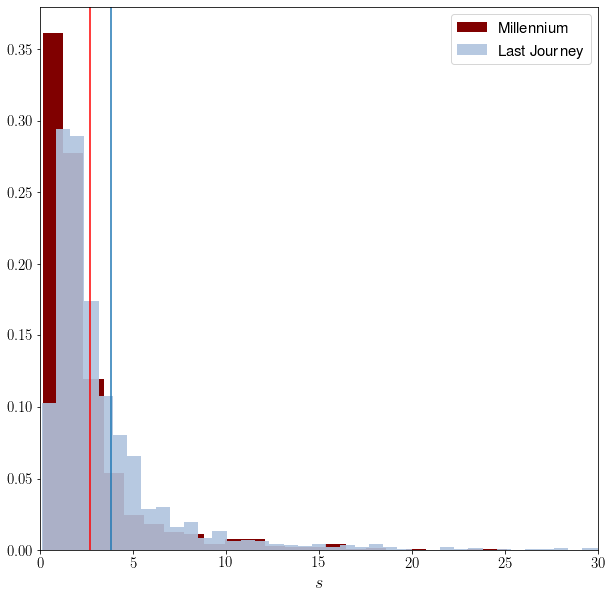

In [26]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin0]),c='red')
plt.axvline(np.mean([i for i in spin0]))
plt.hist([i for i in mspin0],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in spin0],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0,30)

plt.yscale('linear')
plt.xlabel('$s$',size=18)
plt.savefig('_sv0.png')
plt.show()

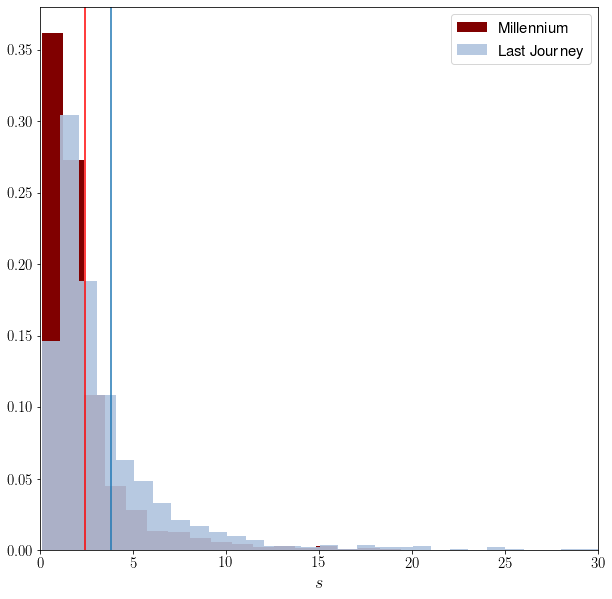

In [27]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin024]),c='red')
plt.axvline(np.mean([i*(1/(1+0.24)**2) for i in spin024]))
plt.hist([i for i in mspin024],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.24)**2) for i in spin024],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0,30)

plt.yscale('linear')
plt.xlabel('$s$',size=18)
plt.savefig('_sv024.png')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


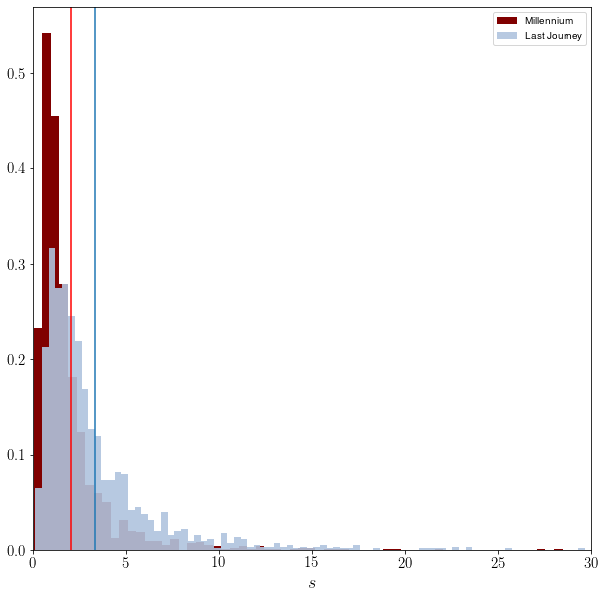

In [28]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin062]),c='red')
plt.axvline(np.mean([i*(1/(1+0.62)**2) for i in spin062]))
plt.hist([i for i in mspin062],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.62)**2) for i in spin062],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0,30)

plt.yscale('linear')
plt.xlabel('$s$',size=18)
plt.savefig('_sv062.png')
plt.show()

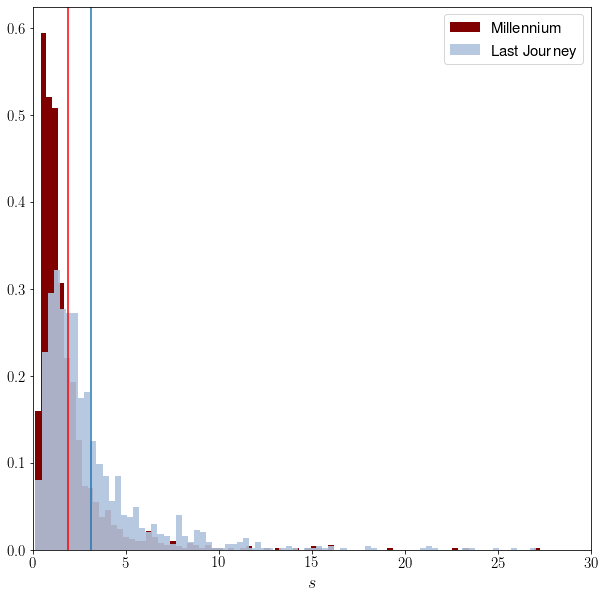

In [29]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin082]),c='red')
plt.axvline(np.mean([i*(1/(1+0.82)**2) for i in spin082]))
plt.hist([i for i in mspin082],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.82)**2) for i in spin082],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0,30)

plt.yscale('linear')
plt.xlabel('$s$',size=18)
plt.savefig('_sv082.png')
plt.show()

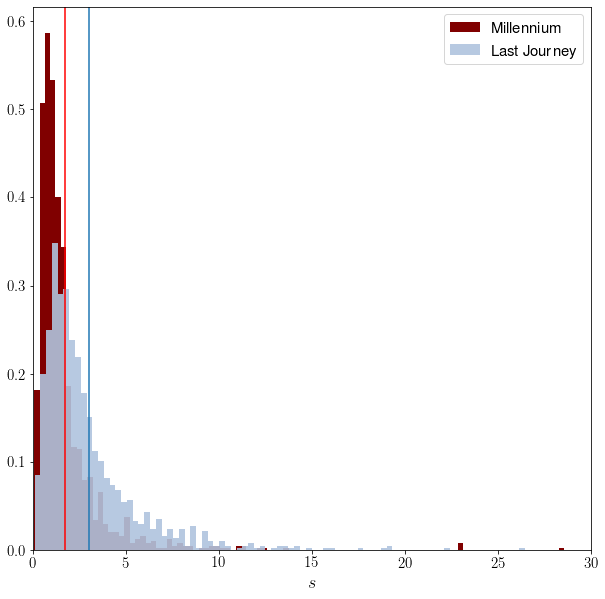

In [30]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin1]),c='red')
plt.axvline(np.mean([i*(1/(1+1)**2) for i in spin1]))
plt.hist([i for i in mspin1],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1+1)**2) for i in spin1],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim(0,30)

plt.yscale('linear')
plt.xlabel('$s$',size=18)
plt.savefig('_sv1.png')
plt.show()

---

# VelDisp

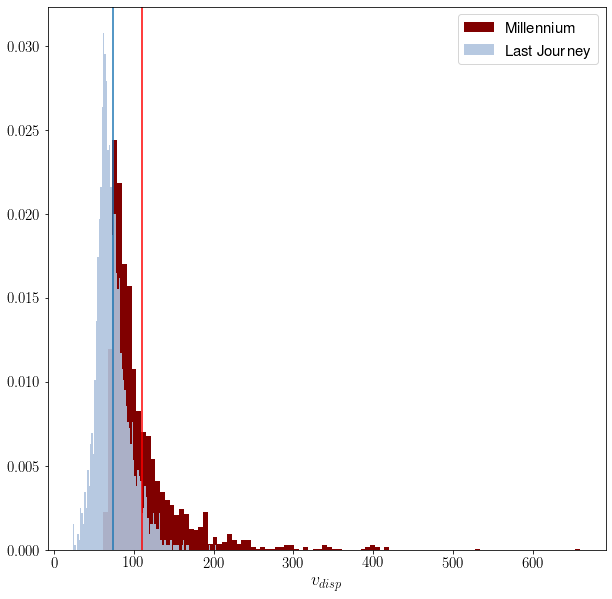

In [31]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis0]),c='red')
plt.axvline(np.mean([i for i in vdis0]))
plt.hist([i for i in mvdis0],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in vdis0],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{disp}$',size=18)
plt.savefig('vdz0.png')

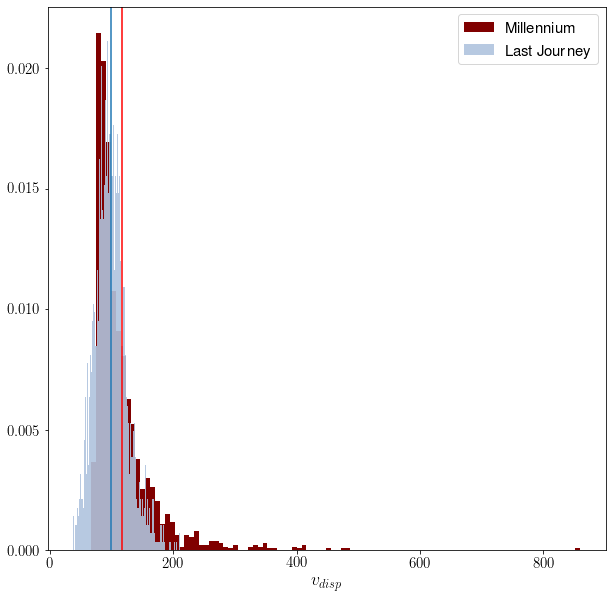

In [32]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis024]),c='red')
plt.axvline(np.mean([i*(1/0.7)*(1/(1+0.24))**1 for i in vdis024]))
plt.hist([i for i in mvdis024],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/0.7)*(1/(1+0.24))**1 for i in vdis024],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0.24",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{disp}$',size=18)

plt.savefig('vdz024.png')

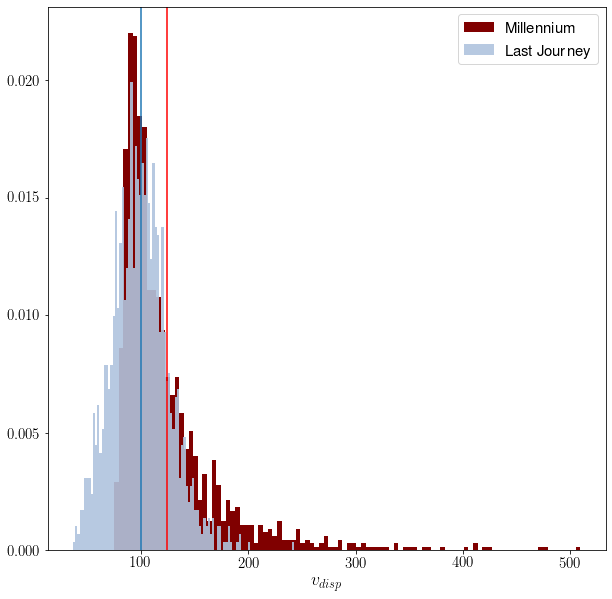

In [33]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis062]),c='red')
plt.axvline(np.mean([i*(1/0.7)*(1/(1+0.62))**1 for i in vdis062]))
plt.hist([i for i in mvdis062],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/0.7)*(1/(1+0.62))**1 for i in vdis062],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0.62",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{disp}$',size=18)

plt.savefig('vdz062.png')

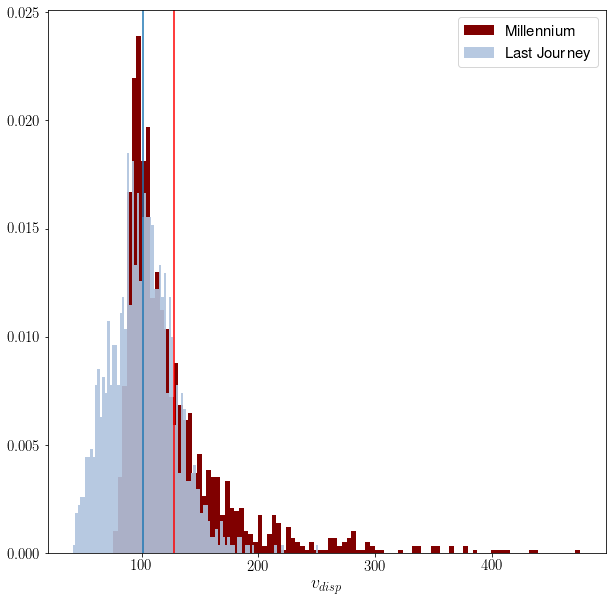

In [34]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis082]),c='red')
plt.axvline(np.mean([i*(1/0.7)*(1/(1+0.82))**1 for i in vdis082]))
plt.hist([i for i in mvdis082],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/0.7)*(1/(1+0.82))**1 for i in vdis082],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0.82",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{disp}$',size=18)

plt.savefig('vdz082.png')

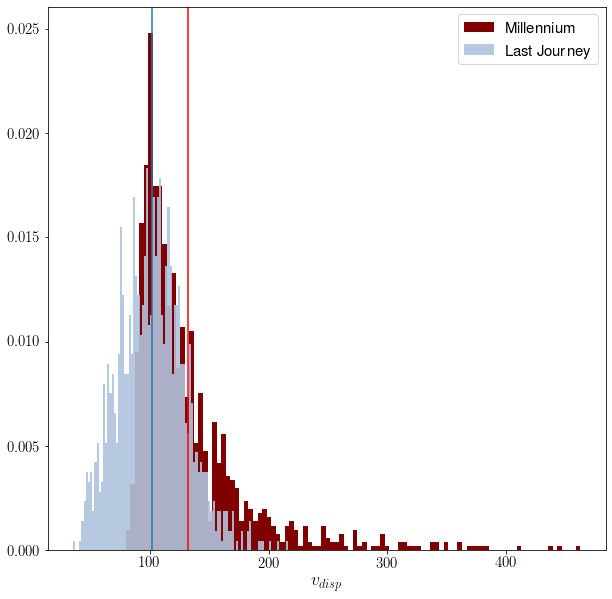

In [35]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis1]),c='red')
plt.axvline(np.mean([i*(1/0.7)*(1/(1+1))**1 for i in vdis1]))
plt.hist([i for i in mvdis1],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/0.7)*(1/(1+1))**1 for i in vdis1],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=1",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{disp}$',size=18)

plt.savefig('vdz1.png')

---

# Vmax

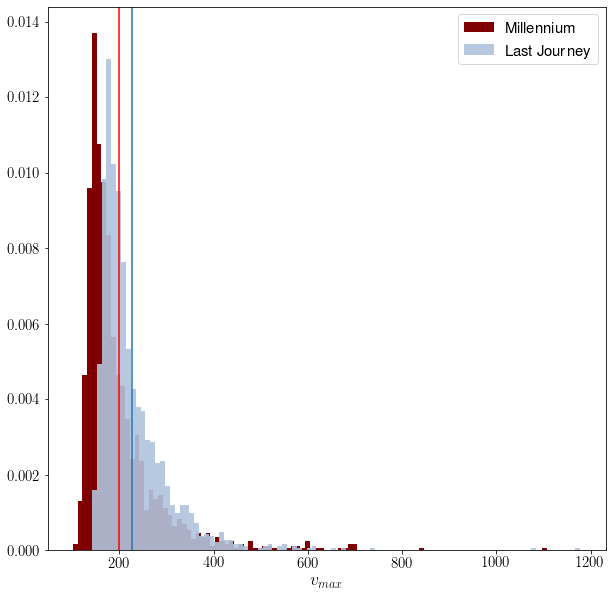

In [36]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax0]),c='red')
plt.axvline(np.mean([i for i in vmax0]))
plt.hist([i for i in mvmax0],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i for i in vmax0],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{max}$',size=18)

plt.savefig('_vmaxz0.png')

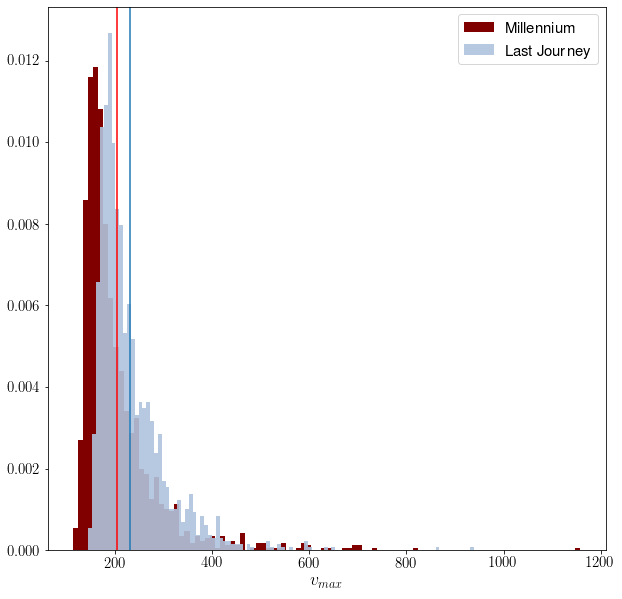

In [37]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax024]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+0.24))**(1/2)) for i in vmax024]))
plt.hist([i for i in mvmax024],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+0.24))**(1/2)) for i in vmax024],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0.24",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{max}$',size=18)

plt.savefig('_vmaxz024.png')

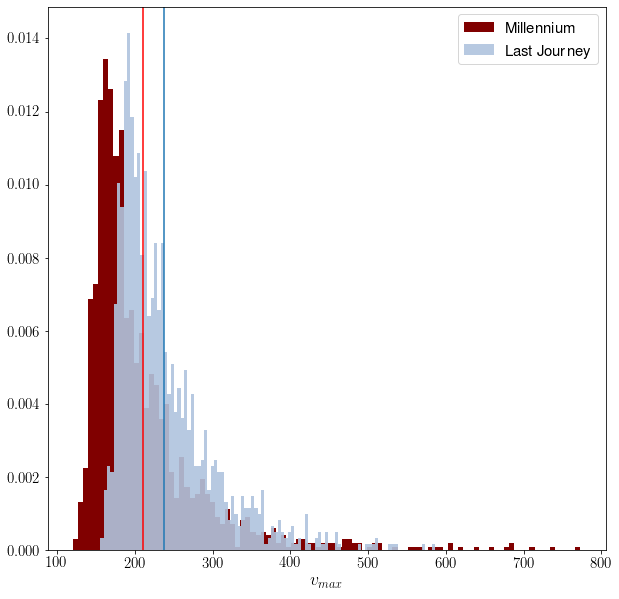

In [38]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax062]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+0.62))**(1/2)) for i in vmax062]))
plt.hist([i for i in mvmax062],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+0.62))**(1/2)) for i in vmax062],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0.62",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{max}$',size=18)

plt.savefig('_vmaxz062.png')

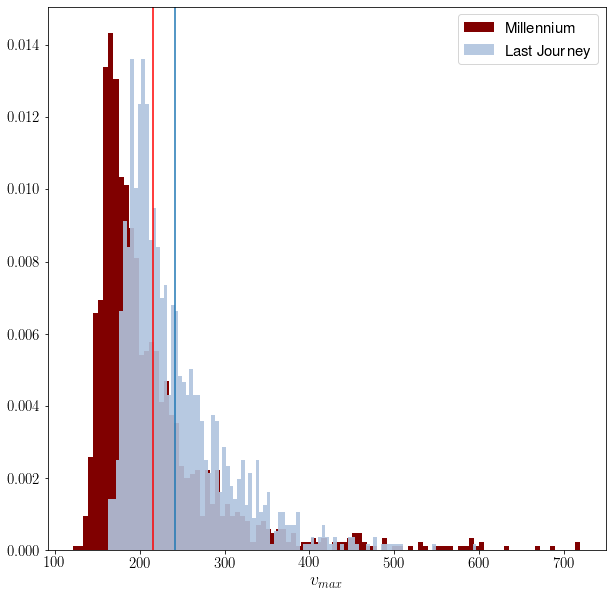

In [39]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax082]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+0.82))**(1/2)) for i in vmax082]))
plt.hist([i for i in mvmax082],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+0.82))**(1/2)) for i in vmax082],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=0.82",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{max}$',size=18)

plt.savefig('_vmaxz082.png')

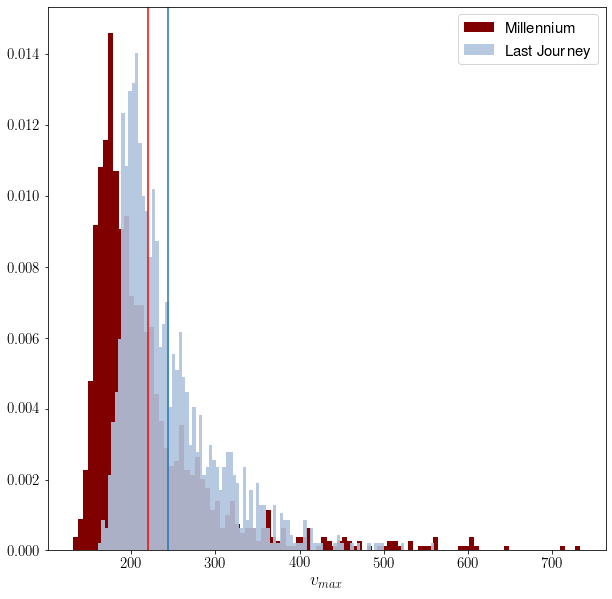

In [40]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax1]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+1))**(1/2)) for i in vmax1]))
plt.hist([i for i in mvmax1],density=True,bins=100,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+1))**(1/2)) for i in vmax1],density=True,bins=100,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
# plt.text(1.4,4,"z=1",size=12)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(1.2,2.8)
plt.xlabel('$v_{max}$',size=18)
plt.savefig('_vmaxz1.png')


---

# Differences

In [41]:
zs = [0.,0.24,0.62,0.82,1.,2.,3.]
z0diff = np.mean(np.log10([i for i in spin0]))-np.mean(np.log10([i for i in mspin0]))
z024diff = np.mean(np.log10([i*(1/(1+0.24)**2) for i in spin024]))-np.mean(np.log10([i for i in mspin024]))
z062diff = np.mean(np.log10([i*(1/(1+0.62)**2) for i in spin062]))-np.mean(np.log10([i for i in mspin062]))
z082diff = np.mean(np.log10([i*(1/(1+0.82)**2) for i in spin082]))-np.mean(np.log10([i for i in mspin082]))
z1diff = np.mean(np.log10([i*(1/(1+1.)**2) for i in spin1]))-np.mean(np.log10([i for i in mspin1]))
z2diff = np.mean(np.log10([i*(1/(1+2.)**2) for i in spin2]))-np.mean(np.log10([i for i in mspin2]))
z3diff = np.mean(np.log10([i*(1/(1+3.)**2) for i in spin3]))-np.mean(np.log10([i for i in mspin3]))

Text(0.5, 0, 'z')

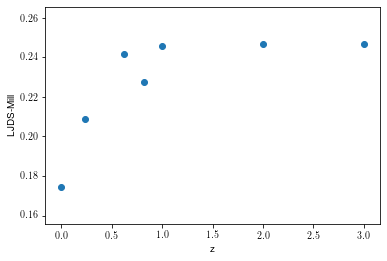

In [42]:
plt.scatter(zs,[z0diff,z024diff,z062diff,z082diff,z1diff,z2diff,z2diff])
plt.ylabel('LJDS-Mill')
plt.xlabel('z')

In [43]:
zs = [0.,0.24,0.62,0.82,1.,2.,3.]
z0diff = np.mean(np.log10([i for i in vdis0]))-np.mean(np.log10([i for i in mvdis0]))
z024diff = np.mean(np.log10([i*(1/(1+0.24)**1) for i in vdis024]))-np.mean(np.log10([i for i in mvdis024]))
z062diff = np.mean(np.log10([i*(1/(1+0.62)**1) for i in vdis062]))-np.mean(np.log10([i for i in mvdis062]))
z082diff = np.mean(np.log10([i*(1/(1+0.82)**1) for i in vdis082]))-np.mean(np.log10([i for i in mvdis082]))
z1diff = np.mean(np.log10([i*(1/(1+1.)**1) for i in vdis1]))-np.mean(np.log10([i for i in mvdis1]))
z2diff = np.mean(np.log10([i*(1/(1+2.)**1) for i in vdis2]))-np.mean(np.log10([i for i in mvdis2]))
z3diff = np.mean(np.log10([i*(1/(1+3.)**1) for i in vdis3]))-np.mean(np.log10([i for i in mvdis3]))

Text(0.5, 0, '$z$')

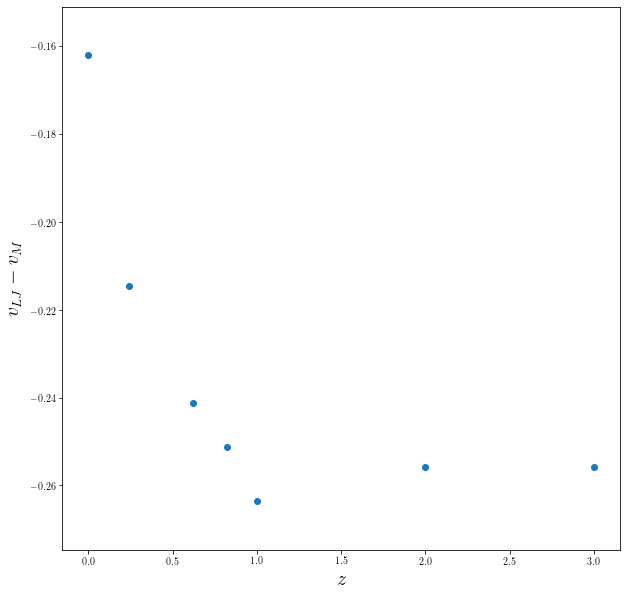

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(zs,[z0diff,z024diff,z062diff,z082diff,z1diff,z2diff,z2diff])
plt.ylabel('$v_{LJ}-v_{M}$',size=20)
plt.xlabel('$z$',size=20)

---

# Mass comp

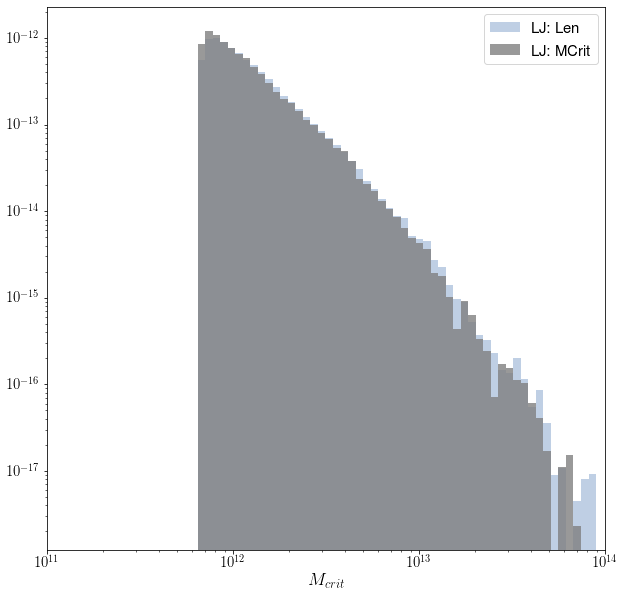

In [45]:
plt.figure(figsize=(10,10))
# bins=np.linspace(430000000000.0,1e15,1000)
bins=np.logspace(11,15, 100)
# plt.axvline(500)
# plt.hist([i for i in mleng if i!=0],density=True,bins=bins,color='maroon',label='Millennium: Len',alpha=0.8)
# plt.hist([i for i in mmcrit if i!=0],density=True,bins=bins,color='grey',label='Millennium: MCrit',alpha=0.8)
plt.hist([i for i in leng if i!=0],density=True,bins=bins,color='lightsteelblue',label='LJ: Len',alpha=0.8)
plt.hist([i for i in mcrit if i!=0],density=True,bins=bins,color='grey',label='LJ: MCrit',alpha=0.8)
plt.legend(prop={'size':15})
# plt.text(4,2,"Len",size=12)
plt.xlim(1e11,1e14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$M_{crit}$',size=18)
plt.show()
# plt.savefig('fofsodcomp.png')

---